In [1]:
# Byte encoding using utf-8
# Eg:
s = "안녕 좋은 아침".encode("utf-8")

In [2]:
list(s)

[236,
 149,
 136,
 235,
 133,
 149,
 32,
 236,
 162,
 139,
 236,
 157,
 128,
 32,
 236,
 149,
 132,
 236,
 185,
 168]

In [3]:
# Byte sequences can be very lkng - making the attention mechanism can become very complex
# Hence we need to compress these byte sequences into something smaller - Byte Pair Encoding

# Consider the example (for Byte Pair Encoding)

# string = aaabdaaabac
# 1. Byte pair "aa" occurs most often, hence we replace 'aa' with Z (random representation)
# string = ZabdZabac
# Z = aa
# 2. Then the process is repeated with byte pair "ab", replacing it with Y
# string = ZYdZYac
# Y = ab
# Z = aa
# 3. The only literal byte pair left ("ac") occurs only once, hence we can stop here, unless we decide for recursive bpe (replace ZY with X and so on)
# string = XdXac
# X = ZY
# Y = ab
# Z = aa

# Initial sequence length = 11, Initial Vocab Size = 4
# Final sequence length = 5, Final vocab size = 4 + 3 = 7

In [4]:
# A very large sample :)
text = "Most importantly, we recognize the idea of a child no matter what surface the child is on. We don’t have to re-learn the idea of child for every possible surface it could appear on But right now, our neural network can’t do this. It thinks that an “8” in a different part of the image is an entirely different thing. It doesn’t understand that moving an object around in the picture doesn’t make it something different. This means it has to re-learn the identify of each object in every possible position. That sucks. We need to give our neural network understanding of translation invariance — an “8” is an “8” no matter where in the picture it shows up. We’ll do this using a process called Convolution. The idea of convolution is inspired partly by computer science and partly by biology (i.e. mad scientists literally poking cat brains with weird probes to figure out how cats process images)."
tokens = text.encode("utf-8")
tokens = list(map(int, tokens))
print('*****************************')
print(len(text))
print("*****************************")
print(len(tokens))

*****************************
897
*****************************
921


In [5]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts

stats = get_stats(tokens)
print(sorted(((v, k) for k, v in stats.items()), reverse=True))

[(26, (101, 32)), (24, (116, 32)), (21, (32, 105)), (18, (32, 116)), (16, (115, 32)), (15, (116, 104)), (14, (110, 32)), (14, (105, 110)), (13, (97, 110)), (13, (32, 111)), (12, (226, 128)), (12, (114, 101)), (12, (101, 114)), (12, (100, 32)), (12, (32, 112)), (11, (32, 97)), (10, (121, 32)), (10, (32, 99)), (9, (117, 114)), (9, (111, 110)), (9, (104, 105)), (9, (104, 101)), (9, (97, 116)), (9, (46, 32)), (8, (111, 32)), (8, (105, 115)), (8, (101, 97)), (8, (97, 114)), (8, (32, 110)), (8, (32, 100)), (7, (116, 105)), (7, (114, 32)), (7, (110, 116)), (7, (105, 116)), (7, (101, 110)), (7, (32, 115)), (6, (111, 102)), (6, (110, 103)), (6, (110, 100)), (6, (109, 97)), (6, (104, 97)), (6, (102, 32)), (6, (101, 115)), (6, (100, 101)), (6, (99, 101)), (6, (97, 32)), (6, (32, 109)), (5, (128, 153)), (5, (117, 116)), (5, (114, 97)), (5, (112, 111)), (5, (111, 117)), (5, (110, 101)), (5, (108, 121)), (5, (108, 101)), (5, (105, 111)), (5, (103, 32)), (5, (100, 111)), (5, (32, 119)), (4, (153, 116

In [6]:
# Since (101, 32) is the most frequent byte sequence pair, we can replace it with a number > 255. (256 is a good one to strat with)
most_freq = max(stats, key=stats.get) # TO get the max value pair
most_freq

(101, 32)

In [7]:
def bpe(ids, pair, idx):
    newids = []
    i = 0
    while i<len(ids):
        if i<len(ids)-1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
            newids.append(idx)
            i += 2
        else:
            newids.append(ids[i])
            i += 1
    return newids

print(len(bpe(tokens, most_freq, 256)))

895


In [8]:
vocab_size = 276
num_merges = vocab_size - 256
ids = list(tokens)

merges = {}
for i in range(num_merges):
    stats = get_stats(ids)
    pair = max(stats, key=stats.get)
    idx = 256 + i
    print(f"Merging pairs {pair} into {idx}")
    ids = bpe(ids, pair, idx)
    merges[pair] = idx

Merging pairs (101, 32) into 256
Merging pairs (116, 32) into 257
Merging pairs (115, 32) into 258
Merging pairs (116, 104) into 259
Merging pairs (110, 32) into 260
Merging pairs (100, 32) into 261
Merging pairs (101, 114) into 262
Merging pairs (226, 128) into 263
Merging pairs (256, 105) into 264
Merging pairs (121, 32) into 265
Merging pairs (105, 110) into 266
Merging pairs (117, 114) into 267
Merging pairs (46, 32) into 268
Merging pairs (97, 110) into 269
Merging pairs (111, 32) into 270
Merging pairs (97, 114) into 271
Merging pairs (32, 111) into 272
Merging pairs (101, 110) into 273
Merging pairs (116, 105) into 274
Merging pairs (102, 32) into 275


In [9]:
merges

{(101, 32): 256,
 (116, 32): 257,
 (115, 32): 258,
 (116, 104): 259,
 (110, 32): 260,
 (100, 32): 261,
 (101, 114): 262,
 (226, 128): 263,
 (256, 105): 264,
 (121, 32): 265,
 (105, 110): 266,
 (117, 114): 267,
 (46, 32): 268,
 (97, 110): 269,
 (111, 32): 270,
 (97, 114): 271,
 (32, 111): 272,
 (101, 110): 273,
 (116, 105): 274,
 (102, 32): 275}

In [10]:
 len(ids)

691

In [11]:
len(tokens)

921

In [12]:
print(f"Comression Ratio: {len(tokens)/len(ids):.2f} times")

Comression Ratio: 1.33 times


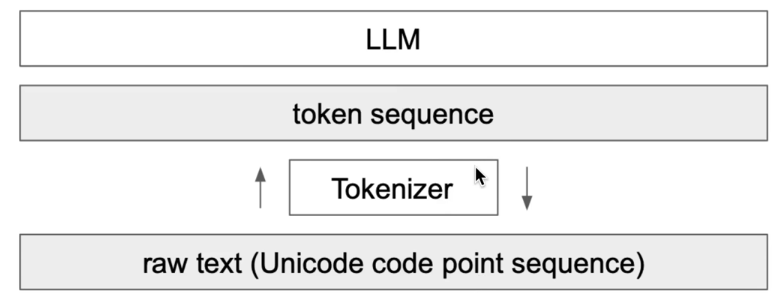

### Decode
Given a sequence of integers in the range [0, vocab_size], whats the text?

In [13]:
vocab = {idx: bytes([idx]) for idx in range(256)}
for (p0, p1), idx in merges.items():
    # print(p0, p1, idx)
    vocab[idx] = vocab[p0] + vocab[p1]

def decode(ids):
    tokens = b"".join(vocab[idx] for idx in ids)
    text = tokens.decode('utf-8', errors="replace")
    return text

decode(ids)

'Most importantly, we recognize the idea of a child no matter what surface the child is on. We don’t have to re-learn the idea of child for every possible surface it could appear on But right now, our neural network can’t do this. It thinks that an “8” in a different part of the image is an entirely different thing. It doesn’t understand that moving an object around in the picture doesn’t make it something different. This means it has to re-learn the identify of each object in every possible position. That sucks. We need to give our neural network understanding of translation invariance — an “8” is an “8” no matter where in the picture it shows up. We’ll do this using a process called Convolution. The idea of convolution is inspired partly by computer science and partly by biology (i.e. mad scientists literally poking cat brains with weird probes to figure out how cats process images).'

In [14]:
def encode(text):
    # given a string return list of integers
    tokens = list(text.encode('utf-8'))
    while len(tokens) >= 2:
        stats = get_stats(tokens)
        best_pair = None
        best_value = float("inf")
        for pair in stats:
            if pair in merges and merges[pair] < best_value:
                best_value = merges[pair]
                best_pair = pair
        # pair = min(stats, key=lambda p: merges.get(p, float("inf"))) # Pair we will merge at this stage of the loop
        if best_pair is None:
            break
        idx = merges[best_pair]
        tokens = bpe(tokens, best_pair, idx)
    return tokens
    
print(encode("hello world!"))

[104, 101, 108, 108, 270, 119, 111, 114, 108, 100, 33]


In [29]:
# Splits your text into a list of tokens, each element of the list is indipendently tokenized.
import regex as re
gpt = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")
words = re.findall(gpt, "Hello World's")

In [30]:
# Redifining the encode function so as to include this regex to encode each word indipendently


['Hello', ' World', "'s"]

SyntaxError: invalid syntax (3719302036.py, line 1)